In [60]:
import pandas as pd 
import numpy as np 
import statsmodels.api as sm 
import seaborn as sns 
import matplotlib.pyplot as plt 
import math


%matplotlib inline
sns.set() 

In [61]:
henk = pd.read_excel('demandAsIs.xlsx', 
                       index_col='Month',  
                      ).squeeze("columns") 

henk.loc[henk['Location'] == 'Ru-Ural'].ImportCaps

Month
2020-11-01    41
2020-12-01    43
2021-01-01    43
2021-02-01    43
2021-03-01    47
2021-04-01    46
2021-05-01    45
2021-06-01    43
2021-07-01    40
2021-08-01    43
2021-09-01    45
2021-10-01    48
2021-11-01    45
2021-12-01    47
2022-01-01    50
2022-02-01    50
2022-03-01    51
2022-04-01    60
2022-05-01    64
2022-06-01    63
2022-07-01    57
2022-08-01    52
2022-09-01    50
2022-10-01    54
2022-11-01    50
Name: ImportCaps, dtype: int64

In [62]:
henk_s = henk.groupby(["Month", "Client"]).sum()
henk_s

ImportCaps  LocalGel  LocalPowder  HomeCare    Fin
Month      Client                                                            
2020-11-01 Ашан                    57       591          196       114    958
           Гиперглобус             37       183          134        43    397
           Гросс                    4        22           24        15     65
           Депо 22                  6        38           19        13     76
           Дикси                   35       111           88       102    336
...                               ...       ...          ...       ...    ...
2022-11-01 Тандер                 839      4875         5191      1643  12548
           Торговый посад          48       548          506       193   1295
           Улыбка радуги            6       145           82        61    294
           Фикс прайс             144      1170         1506       711   3531
           Юниленд-Екат             3       172           47       146    368

[450 rows x 5 columns]

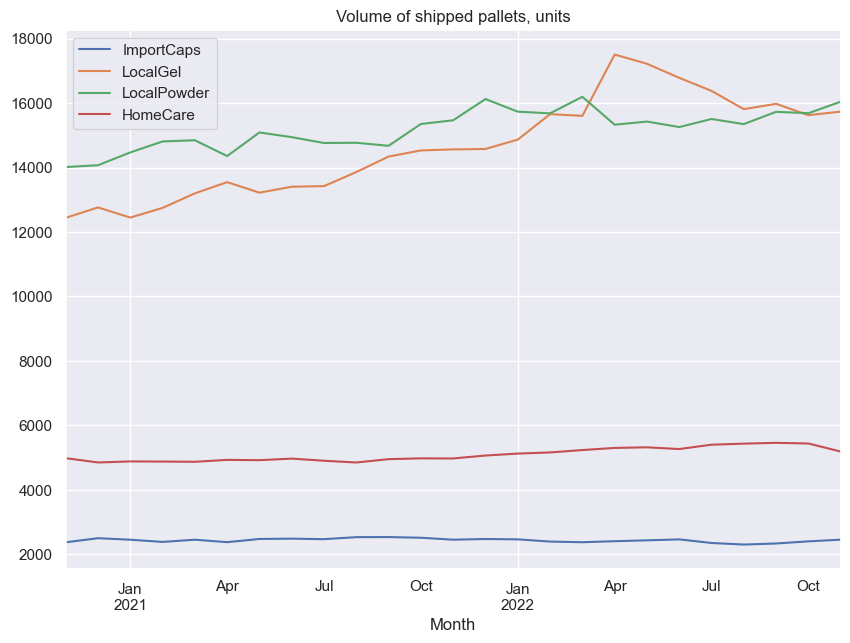

In [63]:
henk.iloc[:,0:6].groupby('Month').sum().plot(figsize=(10,7), title='Volume of shipped pallets, units');

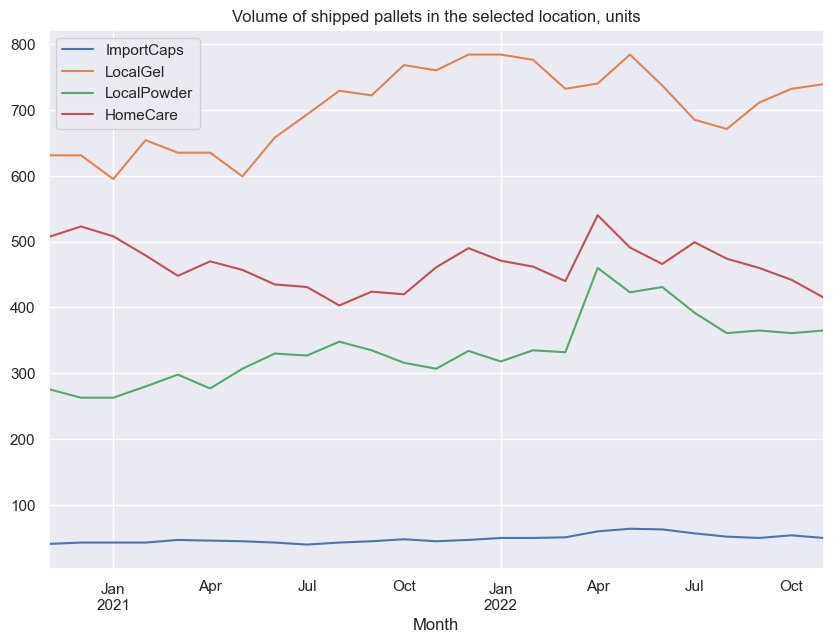

In [64]:
henk.loc[henk['Location'] == 'Ru-Ural'].iloc[:,0:6].plot(figsize=(10,7), title='Volume of shipped pallets in the selected location, units');

In [65]:
h_ic = henk.iloc[:,[0,1,2]].groupby(["Month", "Client"]).sum()
h_lg = henk.iloc[:,[0,1,3]]
h_lp = henk.iloc[:,[0,1,4]]
h_hc = henk.iloc[:,[0,1,5]]
h_fi = henk.iloc[:,[0,1,6]]

h_ic

ImportCaps
Month      Client                    
2020-11-01 Ашан                    57
           Гиперглобус             37
           Гросс                    4
           Депо 22                  6
           Дикси                   35
...                               ...
2022-11-01 Тандер                 839
           Торговый посад          48
           Улыбка радуги            6
           Фикс прайс             144
           Юниленд-Екат             3

[450 rows x 1 columns]

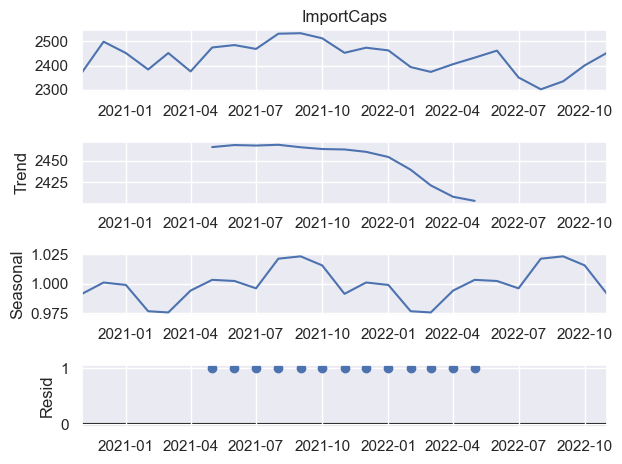

In [66]:
ic_d = sm.tsa.seasonal_decompose(henk.groupby(["Month"]).ImportCaps.sum(), model='multiplicative')
ic_d.plot();

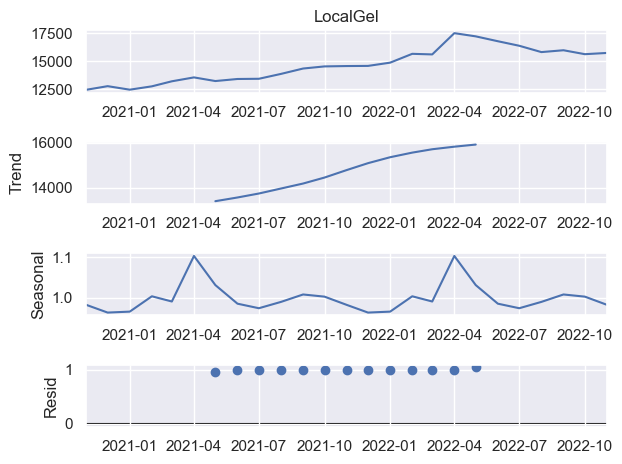

In [67]:
lg_d = sm.tsa.seasonal_decompose(henk.groupby(["Month"]).LocalGel.sum(), model='multiplicative')
lg_d.plot();

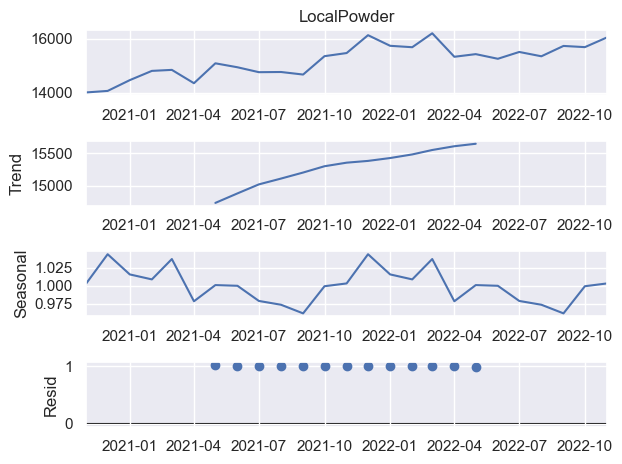

In [68]:
lp_d = sm.tsa.seasonal_decompose(henk.groupby(["Month"]).LocalPowder.sum(), model='multiplicative')
lp_d.plot();

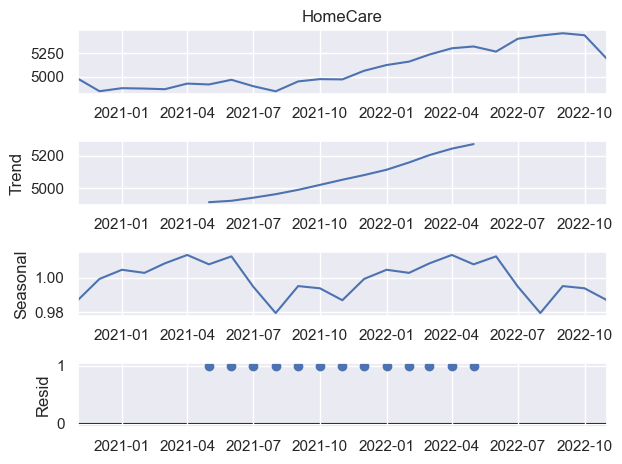

In [69]:
hc_d = sm.tsa.seasonal_decompose(henk.groupby(["Month"]).HomeCare.sum(), model='multiplicative')
hc_d.plot();

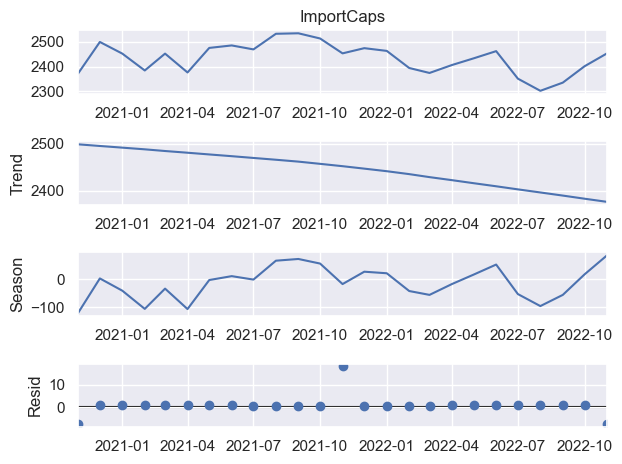

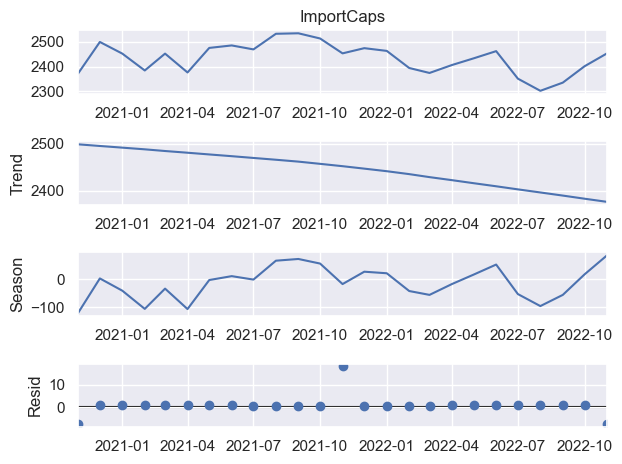

In [70]:
from statsmodels.tsa.seasonal import STL

ic_stl = STL(henk.groupby(["Month"]).ImportCaps.sum(), seasonal=13, 
                ).fit()
ic_stl.plot()

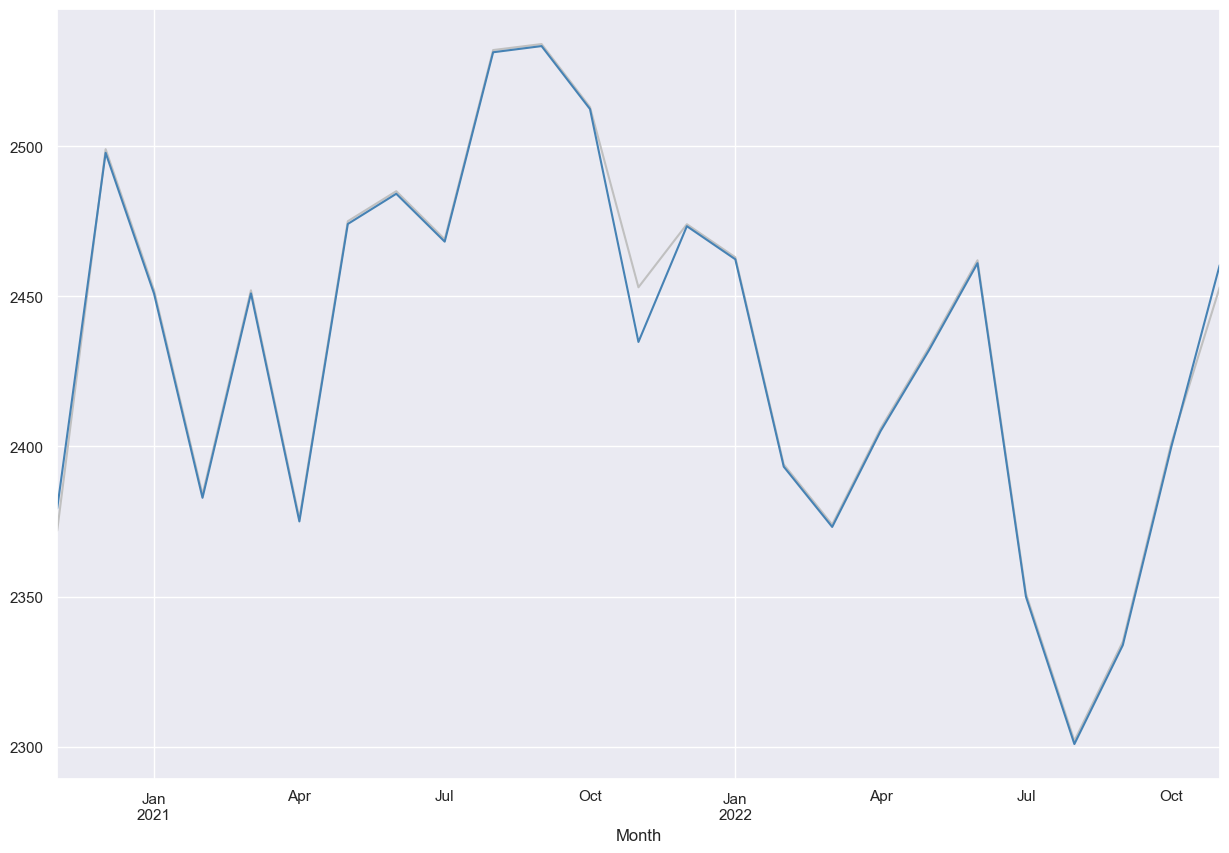

In [71]:
ic_pred_stl = ic_stl.trend + ic_stl.seasonal

plt.subplots(figsize=(15, 10))
henk.groupby('Month').sum().ImportCaps.plot(color='silver')
ic_pred_stl.plot(color='steelblue');

### Exponencial Smoothing

In [72]:
from statsmodels.tsa.holtwinters import SimpleExpSmoothing

In [73]:
x=henk.groupby(["Month"]).ImportCaps.sum()
x.index.freq='MS'

ic_m_exp1 = SimpleExpSmoothing(x, 
                               initialization_method="heuristic"
                              ).fit(smoothing_level=0.8, 
                                    optimized=False)

In [74]:
ic_f_exp1 = ic_m_exp1.forecast(12) 
ic_fit_exp1 = ic_m_exp1.fittedvalues 

In [75]:
x=henk.groupby(["Month"]).ImportCaps.sum()
x.index.freq='MS'

ic_m_exp2 = SimpleExpSmoothing(x, 
                               initialization_method="heuristic"
                              ).fit(optimized=True
                                   )

ic_f_exp2 = ic_m_exp2.forecast(12)
ic_fit_exp2 = ic_m_exp2.fittedvalues

ic_m_exp2.params_formatted 

,name,param,optimized
smoothing_level,alpha,0.520651,True
initial_level,l.0,2417.537509,True


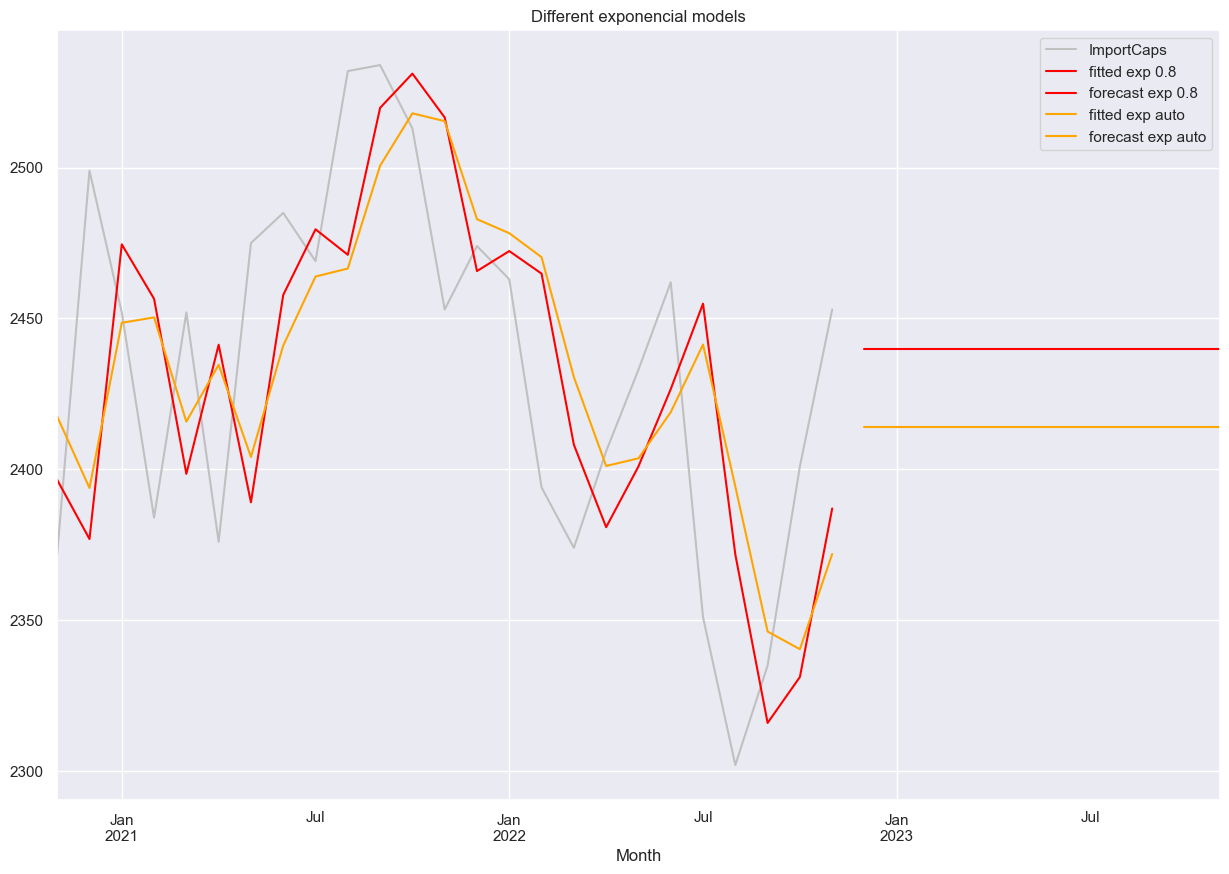

In [76]:
plt.subplots(figsize=(15, 10))
henk.groupby('Month').sum().ImportCaps.plot(color='silver')
ic_fit_exp1.plot(label='fitted exp 0.8', color='red')
ic_f_exp1.plot(label='forecast exp 0.8', color='red')
ic_fit_exp2.plot(label='fitted exp auto', color='orange')
ic_f_exp2.plot(label='forecast exp auto', color='orange')
plt.title('Different exponencial models')
plt.legend();

### Holt's Method

In [77]:
from statsmodels.tsa.holtwinters import ExponentialSmoothing

In [78]:
x=henk.groupby(["Month"]).ImportCaps.sum()
x.index.freq='MS'

ic_m_holt1 = ExponentialSmoothing(x, 
                               initialization_method="heuristic", 
                               trend='additive', 
                               seasonal=None                                 
                              ).fit(smoothing_level=0.8, smoothing_trend=0.1, optimized=False)

In [79]:
ic_fit_holt1 = ic_m_holt1.fittedvalues
ic_f_holt1 = ic_m_holt1.forecast(12)


In [80]:
x=henk.groupby(["Month"]).ImportCaps.sum()
x.index.freq='MS'

ic_m_holt2 = ExponentialSmoothing(x, 
                               initialization_method="heuristic", 
                               trend='additive',
                               seasonal=None                                 
                              ).fit(optimized=True)
ic_m_holt2.params_formatted

,name,param,optimized
smoothing_level,alpha,0.509573,True
smoothing_trend,beta,0.002306,True
initial_level,l.0,2417.703228,True
initial_trend,b.0,-0.220591,True


In [81]:
ic_fit_holt2 = ic_m_holt2.fittedvalues
ic_f_holt2 = ic_m_holt2.forecast(12)

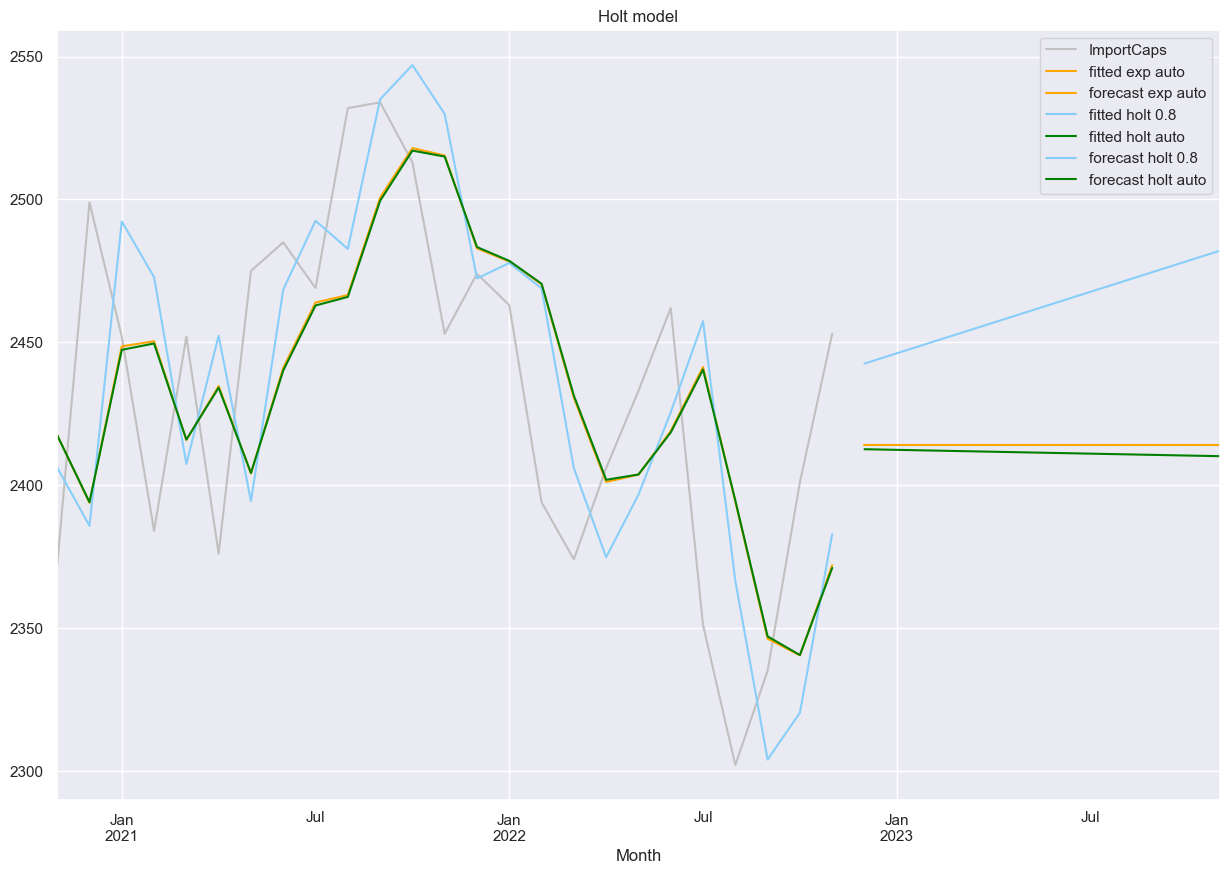

In [82]:
plt.subplots(figsize=(15, 10))
henk.groupby(["Month"]).ImportCaps.sum().plot(color='silver')
ic_fit_exp2.plot(label='fitted exp auto', color='orange')
ic_f_exp2.plot(label='forecast exp auto', color='orange')
ic_fit_holt1.plot(label='fitted holt 0.8', color='lightskyblue')
ic_fit_holt2.plot(label='fitted holt auto', color='green')
ic_f_holt1.plot(label='forecast holt 0.8', color='lightskyblue')
ic_f_holt2.plot(label='forecast holt auto', color='green')
plt.title("Holt model")
plt.legend();

### Winter's Method

In [83]:
x=henk.groupby("Month").ImportCaps.sum()
x.index.freq='MS'


ic_m_winters1 = ExponentialSmoothing(x, 
                               initialization_method="heuristic", 
                               trend='additive', 
                               seasonal='multiplicative',                                  
                              ).fit(smoothing_level=0.8, smoothing_trend=0.1, smoothing_seasonal=0.1,
                                    optimized=False)

In [84]:
ic_fit_winters1 = ic_m_winters1.fittedvalues
ic_f_winters1 = ic_m_winters1.forecast(12)

In [85]:
x = henk.groupby(["Month"]).ImportCaps.sum()
x.index.freq='MS'

ic_m_winters2 = ExponentialSmoothing(x, 
                               initialization_method="heuristic", 
                               trend='additive',
                               seasonal='multiplicative'                                 
                              ).fit(optimized=True)
ic_m_winters2.params_formatted

,name,param,optimized
smoothing_level,alpha,1.000000e+00,True
smoothing_trend,beta,2.125911e-08,True
smoothing_seasonal,gamma,3.788087e-10,True
initial_level,l.0,2.447738e+03,True
initial_trend,b.0,3.497196e+00,True
initial_seasons.0,s.0,9.676939e-01,True
initial_seasons.1,s.1,9.957633e-01,True
initial_seasons.2,s.2,9.828915e-01,True
initial_seasons.3,s.3,9.543146e-01,True
initial_seasons.4,s.4,9.626719e-01,True


In [86]:
ic_fit_winters2 = ic_m_winters2.fittedvalues
ic_f_winters2 = ic_m_winters2.forecast(12)

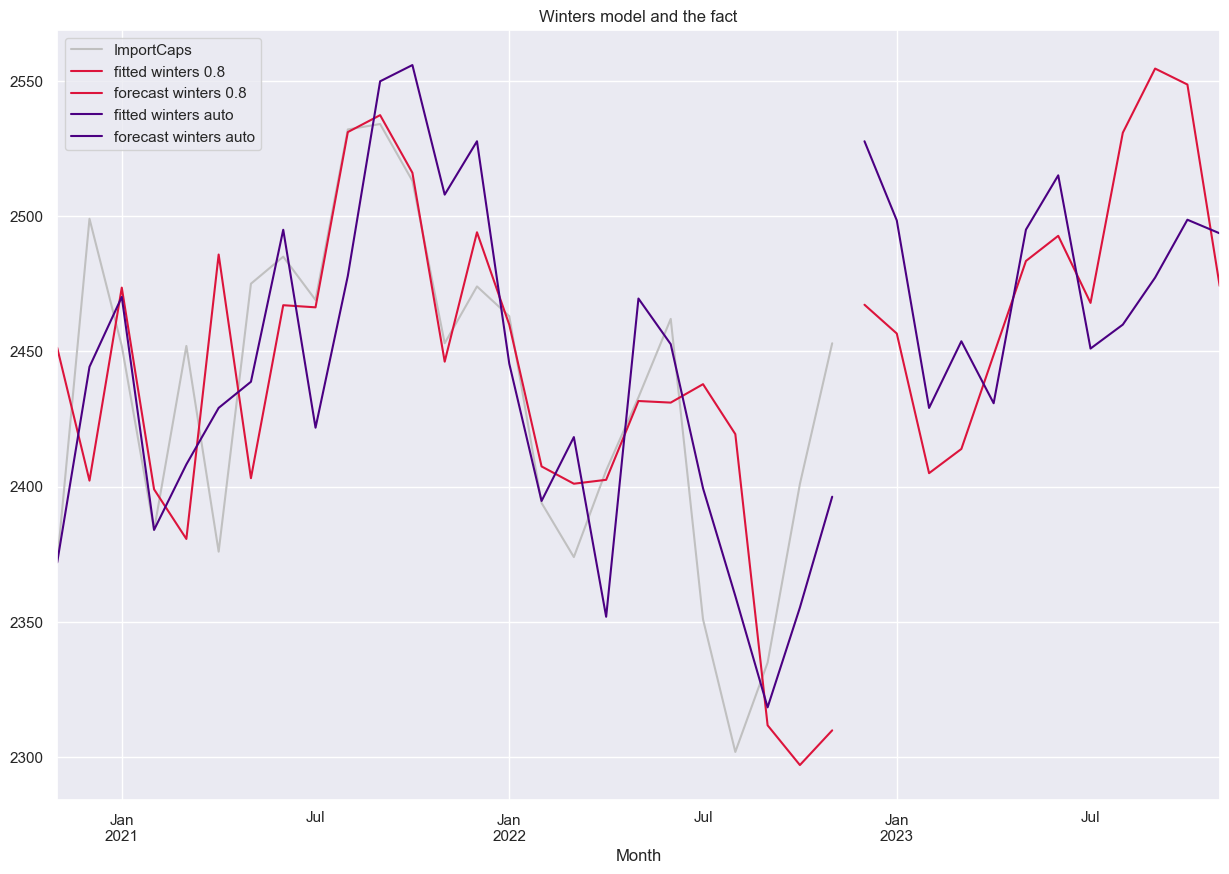

In [87]:
plt.subplots(figsize=(15, 10))
henk.groupby(["Month"]).ImportCaps.sum().plot(color='silver')
ic_fit_winters1.plot(label='fitted winters 0.8', color='crimson')
ic_f_winters1.plot(label='forecast winters 0.8', color='crimson')
ic_fit_winters2.plot(label='fitted winters auto', color='indigo')
ic_f_winters2.plot(label='forecast winters auto', color='indigo')
plt.title("Winters model and the fact")

plt.legend();

# Getting the results

To get the forecast for the specific client and product, change some of the variables according to this key:

Import Caps - ImportCaps 

Local Gel - LocalGel

Local Powder - LocalPowder

Home Care - HomeCare

In [89]:
x = henk[henk['Client']=="Тандер"].groupby("Month").ImportCaps.sum() #change the client and the product here

x.index.freq='MS'

inp = ExponentialSmoothing(x, initialization_method="heuristic", 
                               trend='additive', 
                               seasonal='multiplicative',                                 
                              ).fit(smoothing_level=0.8, smoothing_trend=0.1, smoothing_seasonal=0.1,
                                    optimized=False)

res = inp.forecast(12)
print("The mean value of the demand for the selected client and product is: " + str(math.ceil(res.mean())))
res

The mean value of the demand for the selected client and product is: 839


2022-12-01    848.921308
2023-01-01    854.273754
2023-02-01    812.082475
2023-03-01    845.870401
2023-04-01    823.496628
2023-05-01    818.606002
2023-06-01    839.265235
2023-07-01    802.079795
2023-08-01    827.953886
2023-09-01    852.340276
2023-10-01    871.037041
2023-11-01    866.759635
Freq: MS, dtype: float64